In [58]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scripts.category_analysis import *
from scripts.clustering import *

ModuleNotFoundError: No module named 'scripts.clustering'

In [18]:
adapted_movies_df = pd.read_csv('adapted_movies.csv')
_, adapted_movies_df = analysis_by_category(adapted_movies_df)

In [14]:
all_movies_df = pd.read_csv('all_movies.csv')
_, all_movies_df = analysis_by_category(all_movies_df)

In [48]:
df_genre_adapted, df_transformed_adapted = get_dummy_genre(adapted_movies_df)
df_genre_all, df_transformed_all = get_dummy_genre(all_movies_df)

RangeIndex(start=0, stop=2795, step=1)

In [55]:
plot_sse(df_genre_adapted, start=2, end=10)
# plot_silhouette(X, start=2, end=10)

NameError: name 'plot_sse' is not defined

Text(0.5, 1.0, 't-SNE')

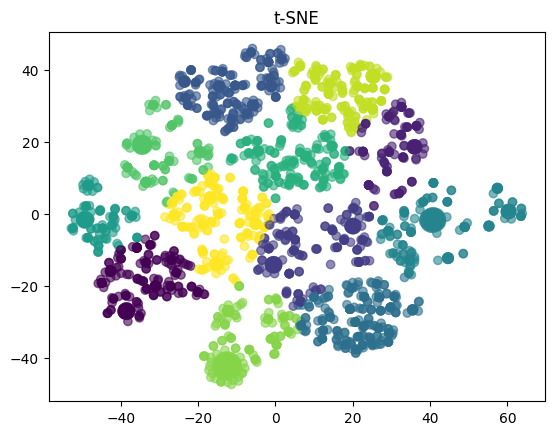

In [ ]:
df = df_genre.drop(columns=['wikipedia_id' ])

X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(df)


# Cluster the data in 3 groups
labels = KMeans(n_clusters=12, random_state=0).fit_predict(X_reduced_tsne)

# Plot the data reduced in 2d space with t-SNE
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, alpha=0.6)
plt.title("t-SNE")

#add genr, movie name and date and author as plotly hover text